<a href="https://colab.research.google.com/github/Sergio-Alan/AI-2025/blob/main/Assignments/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pt 1.- Data Loading and Exploration**

In [ ]:
import pandas as pd

#pandas imported and dataframe created from the dataset
#dataset was downloaded and saved in a Google Drive
file_id = "1IoVF-E6vcXVt9jUBOHYXkJOPsXKzpRNO"
url = f"https://drive.google.com/uc?id={file_id}"
df = pd.read_csv(url)

#displaying the first 10 rows
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
columns_tocheck= ["Glucose", "BloodPressure","SkinThickness","Insulin","BMI","Age"]
def zeros_and_nulls(df, columns_tocheck):
    incons = []
    for column in columns_tocheck:
        if column in df.columns:
            zero = df[df[column] == 0].index.tolist()
            nulls = df[df[column].isnull()].index.tolist()

            zero_str = str(zero) if zero else "None"
            nulls_str = str(nulls) if nulls else "None"

            incons.append({
                "Column": column,
                "Zeros": len(zero),
                "Zero row": zero_str,
                "Nulls": len(nulls),
                "Null row": nulls_str,
                "Total": len(zero) + len(nulls)
            })

    return pd.DataFrame(incons)

#We call the function and the dataframe was converted to an interactive table to see the complete results
zeros_and_nulls(df, columns_tocheck)

,Column,Zeros,Zero row,Nulls,Null row,Total
0,Glucose,5,"[75, 182, 342, 349, 502]",0,None,5
1,BloodPressure,35,"[7, 15, 49, 60, 78, 81, 172, 193, 222, 261, 26...",0,None,35
2,SkinThickness,227,"[2, 5, 7, 9, 10, 11, 12, 15, 17, 21, 22, 26, 2...",0,None,227
3,Insulin,374,"[0, 1, 2, 5, 7, 9, 10, 11, 12, 15, 17, 21, 22,...",0,None,374
4,BMI,11,"[9, 49, 60, 81, 145, 371, 426, 494, 522, 684, ...",0,None,11
5,Age,0,None,0,None,0


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#**Pt.- 2 Data Cleaning and Normalization**

In [ ]:


data_clean = df.copy()

for col in columns_tocheck:
    median_value = data_clean[col].median()
    data_clean[col] = data_clean[col].replace(0, median_value)
print(data_clean)
print("Inconsistent values replaced.\n")
scaler = MinMaxScaler()

numeric_cols = data_clean.drop("Outcome", axis=1).columns

data_clean[numeric_cols] = scaler.fit_transform(data_clean[numeric_cols])
data_clean.head()


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35     30.5  33.6   
1              1       85             66             29     30.5  26.6   
2              8      183             64             23     30.5  23.3   
3              1       89             66             23     94.0  28.1   
4              0      137             40             35    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48    180.0  32.9   
764            2      122             70             27     30.5  36.8   
765            5      121             72             23    112.0  26.2   
766            1      126             60             23     30.5  30.1   
767            1       93             70             31     30.5  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333,1
1,0.058824,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667,0
2,0.470588,0.896774,0.408163,0.173913,0.019832,0.104294,0.253629,0.183333,1
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1


#**Pt.- 3 Data Visualization**

⦁	Histogram of glucose levels before and after normalization.

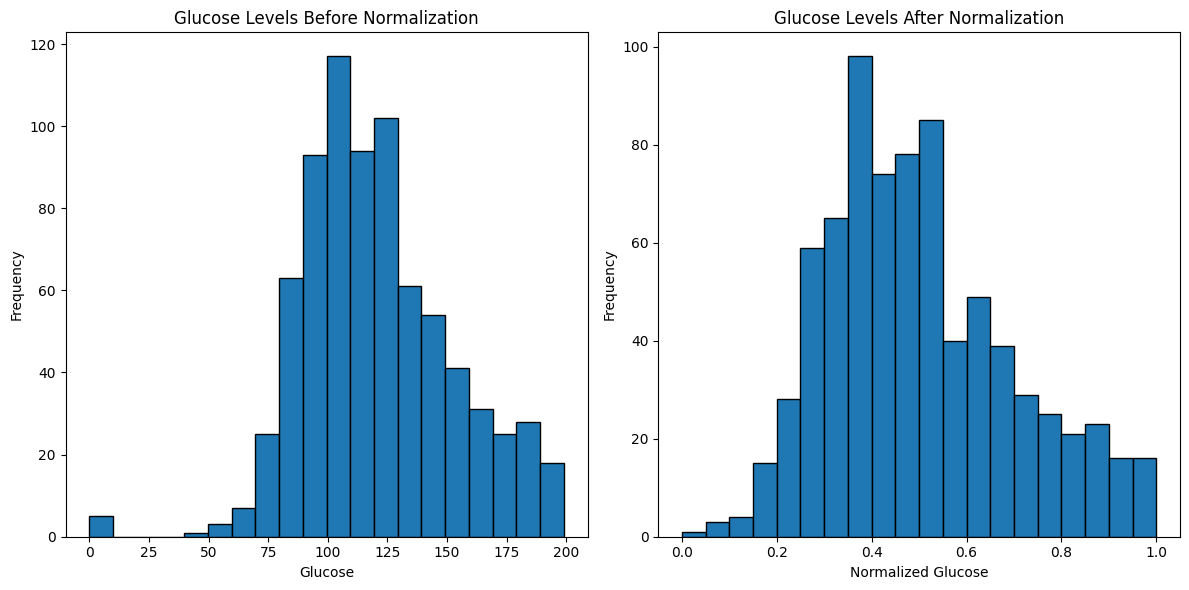

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['Glucose'], bins=20, edgecolor='black')
plt.title('Glucose Levels Before Normalization')
plt.xlabel('Glucose')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(data_clean['Glucose'], bins=20, edgecolor='black')
plt.title('Glucose Levels After Normalization')
plt.xlabel('Normalized Glucose')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

⦁	Boxplot to identify outliers in blood pressure.


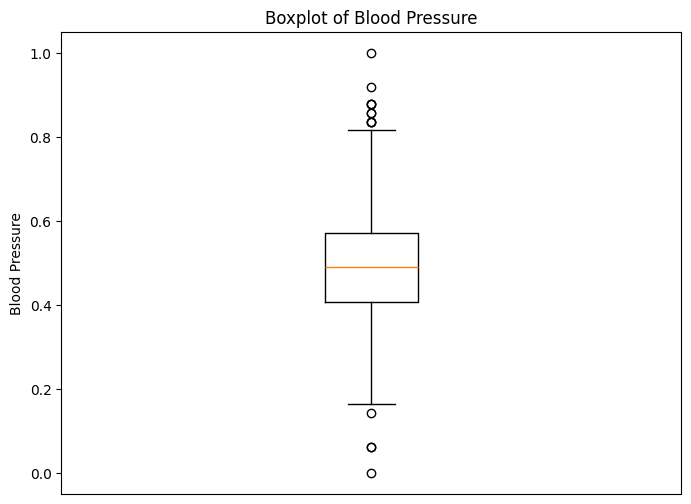

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(data_clean['BloodPressure'])
plt.title('Boxplot of Blood Pressure')
plt.ylabel('Blood Pressure')
plt.xticks([]) # Hide x-axis ticks as it's a single boxplot
plt.show()

⦁	Scatter plot between Glucose and BMI to analyze correlation.




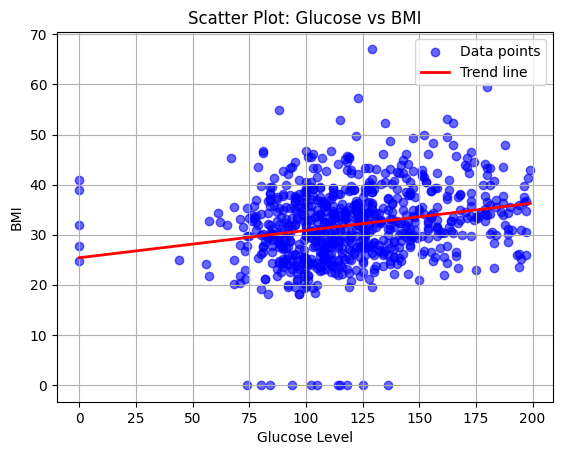

In [ ]:
df = pd.read_csv(url)
plt.scatter(df["Glucose"], df["BMI"], color='blue', alpha=0.6, label="Data points")
X = df["Glucose"].values.reshape(-1, 1)
y = df["BMI"].values

model = LinearRegression()
model.fit(X, y)
x_range = np.linspace(df["Glucose"].min(), df["Glucose"].max(), 100).reshape(-1, 1)
y_pred = model.predict(x_range)
plt.plot(x_range, y_pred, color="red", linewidth=2, label="Trend line")
plt.title("Scatter Plot: Glucose vs BMI")
plt.xlabel("Glucose Level")
plt.ylabel("BMI")
plt.legend()
plt.grid(True)
plt.show()

correlation = df["Glucose"].corr(df["BMI"])

⦁	Bar chart showing the number of patients with and without diabetes (Outcome).

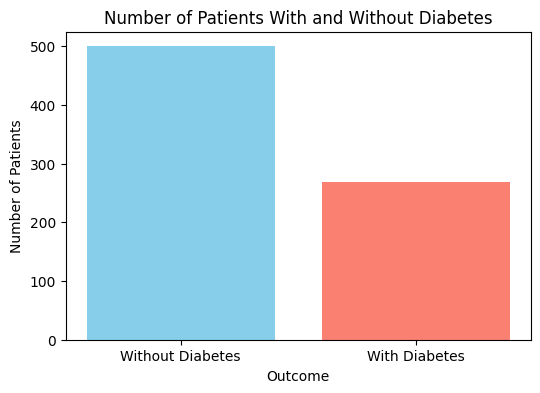

In [ ]:
outcome_counts = data_clean['Outcome'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(outcome_counts.index, outcome_counts.values, tick_label=['Without Diabetes', 'With Diabetes'], color=['skyblue', 'salmon'])
plt.title('Number of Patients With and Without Diabetes')
plt.xlabel('Outcome')
plt.ylabel('Number of Patients')
plt.xticks(outcome_counts.index)
plt.show()

#**Pt.- 4 Questions**

1. What impact do missing values have on data analysis?

They make results less reliable and can cause errors if not handled.

2. How can we detect and handle outliers in biomedical datasets?

We can find them with statistics or plots, and either remove or adjust them.

3. What are some common causes of missing or incorrect data in biomedical studies?

Human error, skipped tests, faulty equipment, or participants dropping out.

4. How does normalizing data improve the performance of Machine Learning models?

It puts features on the same scale so no variable dominates the others.

5. Why is visualizing data an important step before applying Machine Learning models?

It helps spot patterns, errors, and outliers before modeling.

6. Why is preprocessing critical when working with medical datasets?

It cleans errors and inconsistencies to make results more accurate.

7. What ethical concerns should be considered when handling patient data?

Protect privacy, keep data secure, and use it only for approved purposes.